# **ML Analysis and Proccessing of the data**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Read the data

fredData = pd.read_csv('FRED_Data.csv')
fredData

,Date,High Yield Spread,WTI Oil Price,10-Yr Yield
0,2000-09-18,6.35,36.75,5.88
1,2000-09-19,6.41,36.96,5.86
2,2000-09-20,6.43,37.22,5.91
3,2000-09-21,6.45,33.84,5.88
4,2000-09-22,6.50,32.66,5.85
...,...,...,...,...
6332,2024-12-25,NaN,NaN,NaN
6333,2024-12-26,2.86,70.38,4.58
6334,2024-12-27,2.84,71.28,4.62
6335,2024-12-30,2.94,71.73,4.55


In [41]:
# Read the data

nasdaqData = pd.read_csv('dataNQ.csv')
nasdaqData

,Date,Close,SMA100,RSI,VWAP,VIX Close,DXY Close,Daily ROC
0,2000-09-18,3653.50,78.568900,38.636200,3680.333333,20.250000,116.010002,0.006500
1,2000-09-19,3804.00,78.585400,46.782900,3759.000000,19.540001,116.129997,0.041193
2,2000-09-20,3853.00,78.584300,49.899100,3814.166667,19.930000,116.290001,0.012881
3,2000-09-21,3765.00,78.517400,38.345800,3794.333333,20.180000,115.000000,-0.022839
4,2000-09-22,3776.00,78.541200,48.106700,3723.666667,20.740000,113.339996,0.002922
...,...,...,...,...,...,...,...,...
6092,2024-12-12,21651.25,20048.355098,69.595803,21676.000000,13.920000,106.959000,-0.006527
6093,2024-12-13,21795.75,20074.280098,71.296713,21790.083333,13.810000,106.992996,0.006674
6094,2024-12-16,22110.25,20105.460098,74.550898,22008.250000,14.690000,107.029999,0.014429
6095,2024-12-17,22014.75,20133.862598,70.529701,22027.166667,15.870000,106.663002,-0.004319


# Merge the data

In [42]:
# Merge the data

nasdaqData['Date'] = pd.to_datetime(nasdaqData['Date'])
fredData['Date'] = pd.to_datetime(fredData['Date'])

nasdaqData = nasdaqData.drop_duplicates(subset='Date')
fredData = fredData.drop_duplicates(subset='Date')

data_full = pd.merge(nasdaqData, fredData, on = 'Date', how = 'inner')
data_full

,Date,Close,SMA100,RSI,VWAP,VIX Close,DXY Close,Daily ROC,High Yield Spread,WTI Oil Price,10-Yr Yield
0,2000-09-18,3653.50,78.568900,38.636200,3680.333333,20.250000,116.010002,0.006500,6.35,36.75,5.88
1,2000-09-19,3804.00,78.585400,46.782900,3759.000000,19.540001,116.129997,0.041193,6.41,36.96,5.86
2,2000-09-20,3853.00,78.584300,49.899100,3814.166667,19.930000,116.290001,0.012881,6.43,37.22,5.91
3,2000-09-21,3765.00,78.517400,38.345800,3794.333333,20.180000,115.000000,-0.022839,6.45,33.84,5.88
4,2000-09-22,3776.00,78.541200,48.106700,3723.666667,20.740000,113.339996,0.002922,6.50,32.66,5.85
...,...,...,...,...,...,...,...,...,...,...,...
6092,2024-12-12,21651.25,20048.355098,69.595803,21676.000000,13.920000,106.959000,-0.006527,2.66,70.25,4.32
6093,2024-12-13,21795.75,20074.280098,71.296713,21790.083333,13.810000,106.992996,0.006674,2.68,71.54,4.40
6094,2024-12-16,22110.25,20105.460098,74.550898,22008.250000,14.690000,107.029999,0.014429,2.69,71.03,4.39
6095,2024-12-17,22014.75,20133.862598,70.529701,22027.166667,15.870000,106.663002,-0.004319,2.75,70.31,4.40


In [43]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6097 entries, 0 to 6096
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               6097 non-null   datetime64[ns]
 1   Close              6097 non-null   float64       
 2   SMA100             6097 non-null   float64       
 3   RSI                6097 non-null   float64       
 4   VWAP               6093 non-null   float64       
 5   VIX Close          6097 non-null   float64       
 6   DXY Close          6097 non-null   float64       
 7   Daily ROC          6097 non-null   float64       
 8   High Yield Spread  6095 non-null   float64       
 9   WTI Oil Price      6073 non-null   float64       
 10  10-Yr Yield        6053 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 524.1 KB


In [44]:
# Drop the Date column

data_full = data_full.drop('Date', axis = 1)

# **Build the Pipeline**

# Cleaner

In [45]:
# Import the corresponding libraries and modules

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [46]:
# Divide the data into features and target

X = data_full.drop(columns = 'Daily ROC')
y = data_full['Daily ROC']

In [47]:
# Create a class for cleaning the data

class Cleaner(BaseEstimator, TransformerMixin):

    def __init__(self, columns_to_impute = None, n_neighbors = 5):
        self.columns_to_impute = columns_to_impute
        self.n_neighbors = n_neighbors
        self.imputer = None

    def fit(self, X, y = None):

        if self.columns_to_impute:
            self.imputer = KNNImputer(n_neighbors = self.n_neighbors)
            self.imputer.fit(X[self.columns_to_impute])
        return self

    def transform(self, X):

        X_cleaned = X.copy()
        
        # Impute the missing values

        if self.columns_to_impute and self.imputer:
            X_cleaned[self.columns_to_impute] = self.imputer.transform(X_cleaned[self.columns_to_impute])

        # Round 2 decimal places

        X_cleaned = X_cleaned.round(2)

        return X_cleaned

# Set the Pipeline (Cleaner, Standardization)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

columns_to_impute = ['VWAP', 'High Yield Spread', 'WTI Oil Price', '10-Yr Yield']

pipeline = Pipeline([
    ('cleaning', Cleaner(columns_to_impute=columns_to_impute, n_neighbors = 5)),
    ('scaling', StandardScaler())
])

In [49]:
# Fit the pipeline

X_pre = pipeline.fit_transform(X)

In [50]:
X_pre = pd.DataFrame(X_pre, columns = X.columns, index = X.index)
X_pre

,Close,SMA100,RSI,VWAP,VIX Close,DXY Close,High Yield Spread,WTI Oil Price,10-Yr Yield
0,-0.325915,-1.033018,-0.973876,-0.320324,0.052575,2.139112,0.340392,-1.112677,2.200412
1,-0.296013,-1.033014,-0.490536,-0.304684,-0.030352,2.149850,0.363038,-1.104314,2.184021
2,-0.286277,-1.033016,-0.305276,-0.293717,0.015200,2.164167,0.370587,-1.093960,2.224998
3,-0.303762,-1.033029,-0.991095,-0.297661,0.044399,2.048736,0.378135,-1.228561,2.200412
4,-0.301576,-1.033025,-0.411563,-0.311708,0.109806,1.900196,0.397007,-1.275551,2.175825
...,...,...,...,...,...,...,...,...,...
6092,3.250034,3.073584,0.864477,3.257170,-0.686760,1.329303,-1.052327,0.221382,0.921907
6093,3.278744,3.078914,0.965420,3.279849,-0.699608,1.331987,-1.044779,0.272754,0.987471
6094,3.341232,3.085326,1.158400,3.323221,-0.596825,1.335567,-1.041004,0.252444,0.979276
6095,3.322257,3.091166,0.919699,3.326982,-0.459003,1.302458,-1.018358,0.223772,0.987471


In [51]:
# Turn the data into a dataframe

y = pd.DataFrame(y, columns = ['Daily ROC'])
y

,Daily ROC
0,0.006500
1,0.041193
2,0.012881
3,-0.022839
4,0.002922
...,...
6092,-0.006527
6093,0.006674
6094,0.014429
6095,-0.004319


In [52]:
# Train/Test split

X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size = 0.3, random_state = 42)   

In [53]:
from sklearn.metrics import *

In [54]:
# Dataframe to hold the results

metrics = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'R2'], columns = ['Train', 'Test'])

# **M1: Random Forest - Regression**

In [55]:
# Random Search

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_forest = RandomForestRegressor()

random_search = RandomizedSearchCV(estimator = random_forest,
                                   param_distributions = param_grid,
                                   n_iter = 100,
                                   cv = 6,
                                   verbose = 2,
                                   random_state = 42,
                                   n_jobs = -1)

random_search.fit(X_train, y_train)

# Best parameters

best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Best estimator    

best_estimator = random_search.best_estimator_
print("Best estimator: ", best_estimator)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5}
Best estimator:  RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200)


In [56]:

# Predictions on the train and test sets

y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

# Calculate the metrics

metrics.loc['MSE', 'Train'] = mean_squared_error(y_train, y_train_pred)
metrics.loc['MSE', 'Test'] = mean_squared_error(y_test, y_test_pred)
metrics.loc['RMSE', 'Train'] = np.sqrt(metrics.loc['MSE', 'Train'])
metrics.loc['RMSE', 'Test'] = np.sqrt(metrics.loc['MSE', 'Test'])
metrics.loc['MAE', 'Train'] = mean_absolute_error(y_train, y_train_pred)
metrics.loc['MAE', 'Test'] = mean_absolute_error(y_test, y_test_pred)
metrics.loc['R2', 'Train'] = r2_score(y_train, y_train_pred)
metrics.loc['R2', 'Test'] = r2_score(y_test, y_test_pred)

# Display the metrics

print(metrics.round(3))

         Train      Test
MSE   0.000211  0.000251
RMSE  0.014535  0.015839
MAE   0.009987  0.010521
R2    0.199764  0.084228


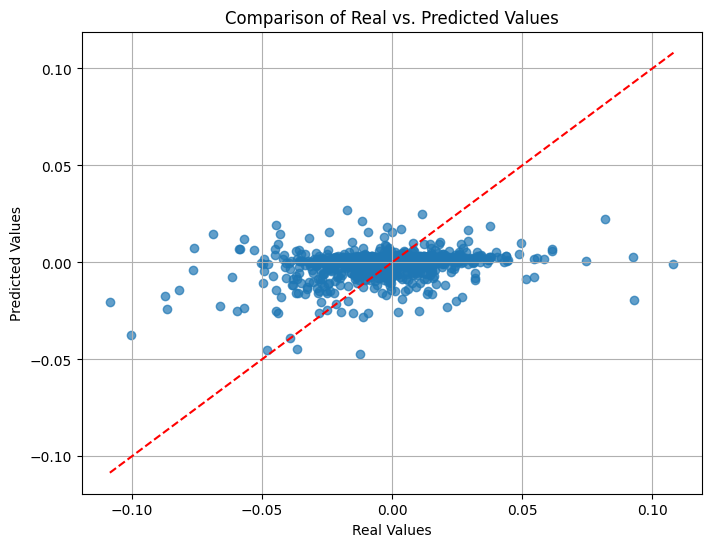

In [57]:
# Plot the results

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_test_pred, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real vs. Predicted Values')
plt.grid(True)
plt.show()

# **M2: SVM - Regression**

In [58]:
# SVM

from sklearn.svm import SVR

param_grid_svm = {
    'C': [0.1, 1, 5, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm_model = SVR()

random_search_svm = RandomizedSearchCV(estimator = svm_model,
                                       param_distributions = param_grid_svm,
                                       n_iter = 100,
                                       cv = 6,
                                       verbose = 2,
                                       random_state = 42,
                                       n_jobs = -1)

random_search_svm.fit(X_train, y_train)

# Best parameters for SVM

best_params_svm = random_search_svm.best_params_
print("Best parameters for SVM found: ", best_params_svm)


# Best estimator for SVM

best_estimator_svm = random_search_svm.best_estimator_
print("Best estimator for SVM: ", best_estimator_svm)

Fitting 6 folds for each of 32 candidates, totalling 192 fits


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVM found:  {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}
Best estimator for SVM:  SVR(C=1, gamma='auto')


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
# Predictions on the train and test sets

y_train_pred_svm = best_estimator_svm.predict(X_train)
y_test_pred_svm = best_estimator_svm.predict(X_test)

# Calculate the metrics for SVM

metrics_svm = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'R2'], columns = ['Train', 'Test'])
metrics_svm.loc['MSE', 'Train'] = mean_squared_error(y_train, y_train_pred_svm)
metrics_svm.loc['MSE', 'Test'] = mean_squared_error(y_test, y_test_pred_svm)
metrics_svm.loc['RMSE', 'Train'] = np.sqrt(metrics_svm.loc['MSE', 'Train'])
metrics_svm.loc['RMSE', 'Test'] = np.sqrt(metrics_svm.loc['MSE', 'Test'])
metrics_svm.loc['MAE', 'Train'] = mean_absolute_error(y_train, y_train_pred_svm)
metrics_svm.loc['MAE', 'Test'] = mean_absolute_error(y_test, y_test_pred_svm)
metrics_svm.loc['R2', 'Train'] = r2_score(y_train, y_train_pred_svm)
metrics_svm.loc['R2', 'Test'] = r2_score(y_test, y_test_pred_svm)

# Display the SVM metrics

print(metrics_svm.round(3))

         Train      Test
MSE   0.000427  0.000472
RMSE  0.020664  0.021719
MAE   0.014501  0.014659
R2   -0.617315 -0.721886


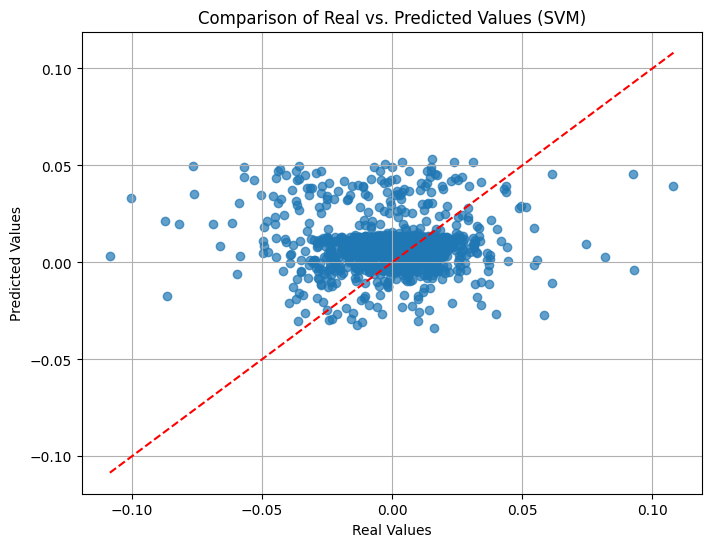

In [60]:
# Plot the results

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_test_pred_svm, alpha = 0.7)   
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real vs. Predicted Values (SVM)')
plt.grid(True)
plt.show()

# **M3: MLP - Regression**

In [61]:
# Multilayer Perceptron (MLP)

from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    'hidden_layer_sizes': [(5,5), (10,), (10, 10), (15, 20)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

mlp_model = MLPRegressor()

random_search_mlp = RandomizedSearchCV(estimator = mlp_model,
                                       param_distributions = param_grid_mlp,
                                       n_iter = 100,
                                       cv = 6,
                                       verbose = 2,
                                       random_state = 42,
                                       n_jobs = -1)

random_search_mlp.fit(X_train, y_train)

# Best parameters for MLP

best_params_mlp = random_search_mlp.best_params_
print("Best parameters for MLP found: ", best_params_mlp)

# Best estimator for MLP

best_estimator_mlp = random_search_mlp.best_estimator_
print("Best estimator for MLP: ", best_estimator_mlp)

Fitting 6 folds for each of 100 candidates, totalling 600 fits
Best parameters for MLP found:  {'solver': 'lbfgs', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (10,), 'alpha': 0.0001, 'activation': 'identity'}
Best estimator for MLP:  MLPRegressor(activation='identity', hidden_layer_sizes=(10,),
             learning_rate='adaptive', solver='lbfgs')


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
# Predictions on the train and test sets

y_train_pred_mlp = best_estimator_mlp.predict(X_train)
y_test_pred_mlp = best_estimator_mlp.predict(X_test)

# Calculate the metrics for MLP

metrics_mlp = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'R2'], columns = ['Train', 'Test'])
metrics_mlp.loc['MSE', 'Train'] = mean_squared_error(y_train, y_train_pred_mlp)
metrics_mlp.loc['MSE', 'Test'] = mean_squared_error(y_test, y_test_pred_mlp)
metrics_mlp.loc['RMSE', 'Train'] = np.sqrt(metrics_mlp.loc['MSE', 'Train'])
metrics_mlp.loc['RMSE', 'Test'] = np.sqrt(metrics_mlp.loc['MSE', 'Test'])
metrics_mlp.loc['MAE', 'Train'] = mean_absolute_error(y_train, y_train_pred_mlp)
metrics_mlp.loc['MAE', 'Test'] = mean_absolute_error(y_test, y_test_pred_mlp)
metrics_mlp.loc['R2', 'Train'] = r2_score(y_train, y_train_pred_mlp)
metrics_mlp.loc['R2', 'Test'] = r2_score(y_test, y_test_pred_mlp)

# Display the MLP metrics

print(metrics_mlp.round(3))

         Train      Test
MSE   0.000271  0.000272
RMSE  0.016475  0.016501
MAE   0.011081  0.011071
R2   -0.028035  0.006066


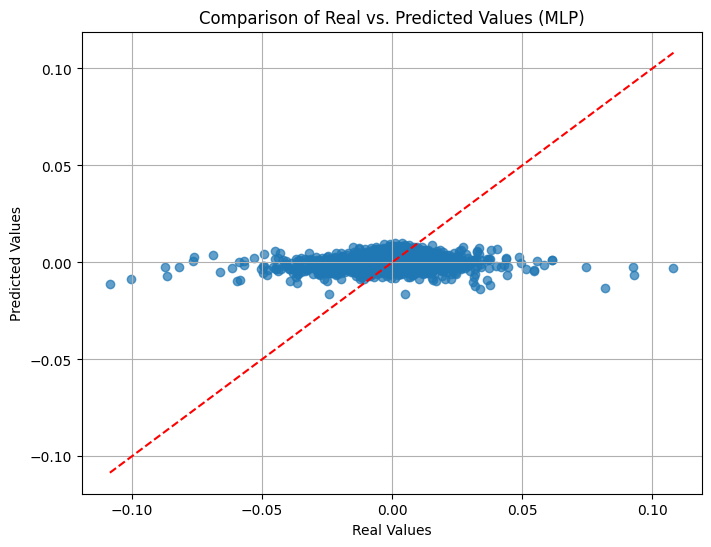

In [63]:
# Plot the results

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_test_pred_mlp, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')             
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real vs. Predicted Values (MLP)')
plt.grid(True)
plt.show()

# **M4: Gradient Boosting Regressor**

In [64]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.8, 0.9, 1.0]
}


gb_model = GradientBoostingRegressor(random_state = 42)

random_search_gb = RandomizedSearchCV(estimator = gb_model,
                                     param_distributions = param_grid_gb,
                                     n_iter = 100,
                                     cv = 6,
                                     verbose = 2,
                                     random_state = 42,
                                     n_jobs = -1)

random_search_gb.fit(X_train, y_train)

# Best parameters for Gradient Boosting

best_params_gb = random_search_gb.best_params_
print("Best parameters for Gradient Boosting found: ", best_params_gb)

# Best estimator for Gradient Boosting

best_estimator_gb = random_search_gb.best_estimator_
print("Best estimator for Gradient Boosting: ", best_estimator_gb)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
144 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
103 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  Fi

Best parameters for Gradient Boosting found:  {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.01}
Best estimator for Gradient Boosting:  GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='sqrt',
                          min_samples_leaf=4, n_estimators=200, random_state=42,
                          subsample=0.9)


In [65]:
# Predictions on the train and test sets

y_train_pred_gb = best_estimator_gb.predict(X_train)
y_test_pred_gb = best_estimator_gb.predict(X_test)

# Calculate the metrics for Gradient Boosting

metrics_gb = pd.DataFrame(index=['MSE', 'RMSE', 'MAE', 'R2'], columns=['Train', 'Test'])
metrics_gb.loc['MSE', 'Train'] = mean_squared_error(y_train, y_train_pred_gb)
metrics_gb.loc['MSE', 'Test'] = mean_squared_error(y_test, y_test_pred_gb)
metrics_gb.loc['RMSE', 'Train'] = np.sqrt(metrics_gb.loc['MSE', 'Train'])
metrics_gb.loc['RMSE', 'Test'] = np.sqrt(metrics_gb.loc['MSE', 'Test'])
metrics_gb.loc['MAE', 'Train'] = mean_absolute_error(y_train, y_train_pred_gb)
metrics_gb.loc['MAE', 'Test'] = mean_absolute_error(y_test, y_test_pred_gb)
metrics_gb.loc['R2', 'Train'] = r2_score(y_train, y_train_pred_gb)
metrics_gb.loc['R2', 'Test'] = r2_score(y_test, y_test_pred_gb)

# Display the Gradient Boosting metrics

print(metrics_gb.round(3))

         Train      Test
MSE   0.000215  0.000253
RMSE  0.014674  0.015912
MAE   0.010053  0.010557
R2    0.184425  0.075762


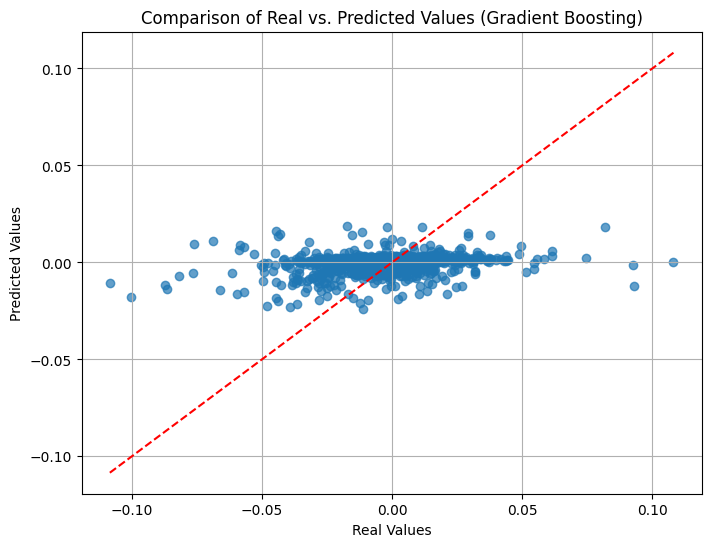

In [66]:
# Plot the results

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_test_pred_gb, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')             
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real vs. Predicted Values (Gradient Boosting)')
plt.grid(True)
plt.show()

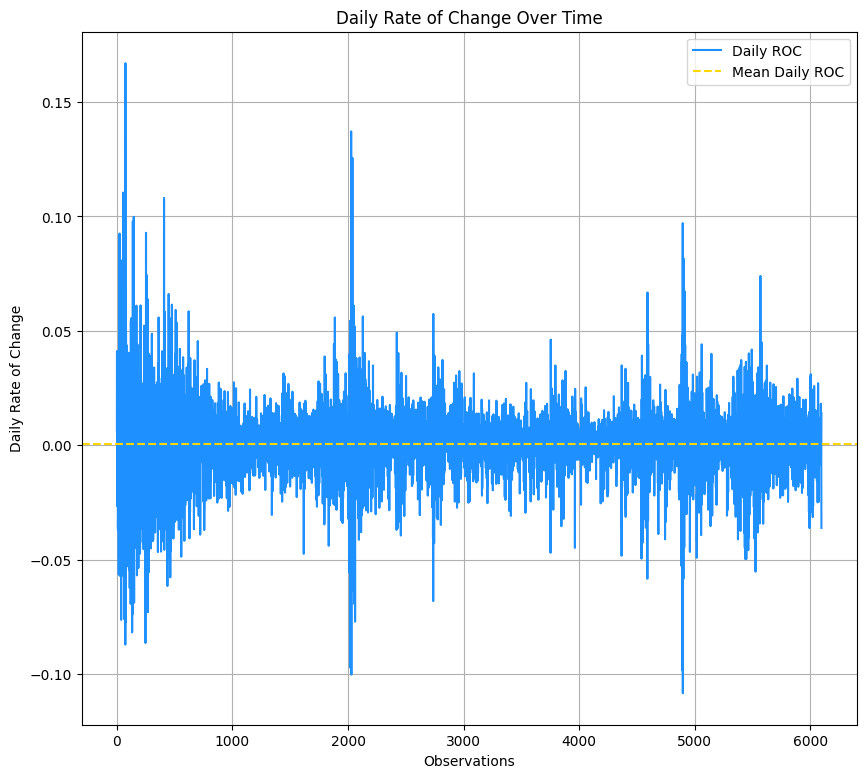

In [88]:
# Plot the Daily Rate of Change (ROC) ---> Target Variable

plt.figure(figsize = (10, 9))
plt.plot(y, label='Daily ROC', color = 'dodgerblue')
plt.title('Daily Rate of Change Over Time')
plt.xlabel('Observations')
plt.ylabel('Daily Rate of Change')  
plt.axhline(y = np.mean(y), color = 'gold', linestyle = '--', label = 'Mean Daily ROC')
plt.legend()
plt.grid(True)


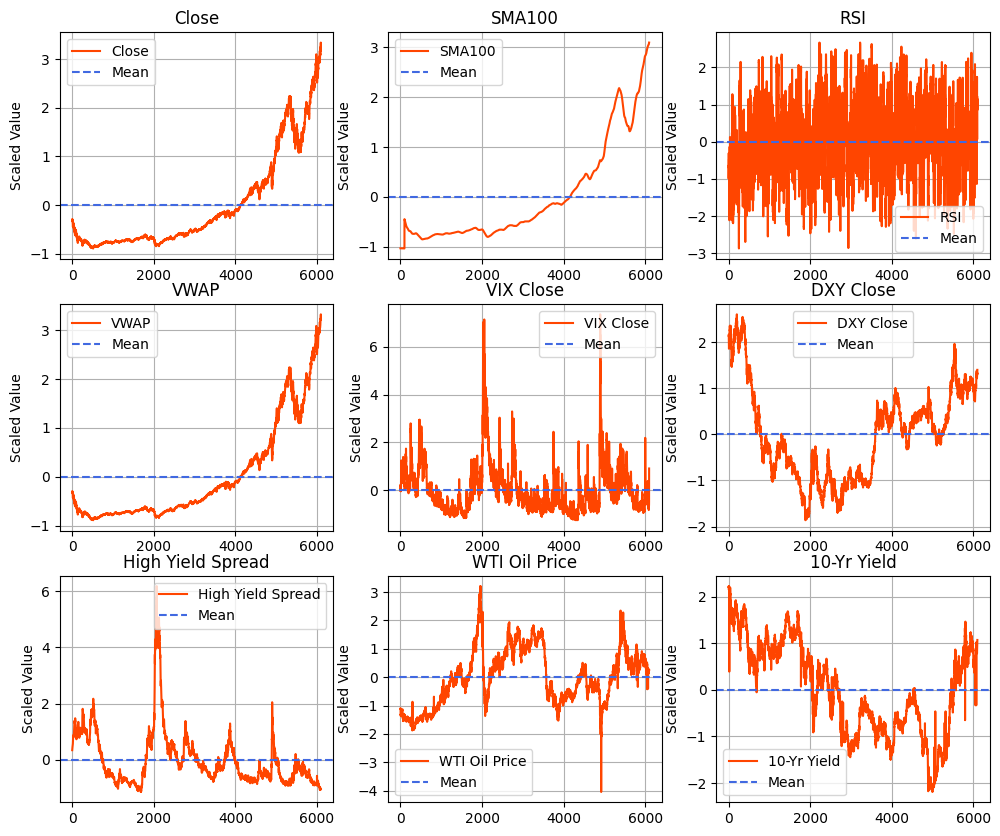

In [86]:
# Plot the features (Scaled)

plt.figure(figsize = (12, 10))

for i, col in enumerate(X_pre.columns):

    plt.subplot(3, 3, i + 1)
    plt.plot(X_pre[col], label = col, color = 'orangered')
    plt.title(col)
    plt.ylabel('Scaled Value')
    plt.axhline(y = np.mean(X_pre[col]), color = 'royalblue', linestyle = '--', label = 'Mean')
    plt.legend()
    plt.grid(True)

# Mutual Information Analysis

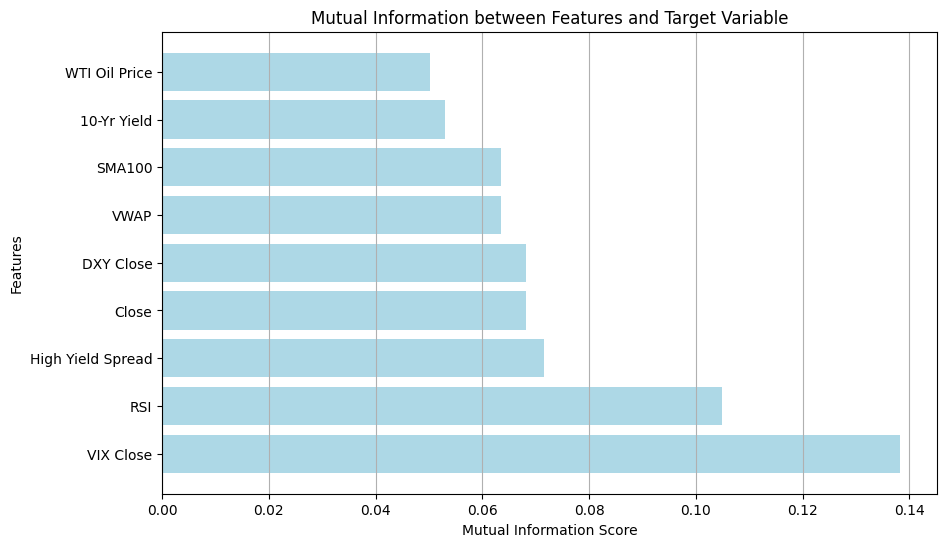

In [95]:
# Mutual Information 

from sklearn.feature_selection import mutual_info_regression


mi = pd.Series(mutual_info_regression(X_pre, y.values.ravel()), index = X_pre.columns)
mi_sorted = mi.sort_values(ascending = False)

# Plot the mutual information values

plt.figure(figsize = (10, 6))
plt.barh(mi_sorted.index, mi_sorted.values, color = 'lightblue')
plt.title('Mutual Information between Features and Target Variable')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.grid(axis = 'x')
plt.show()


# **Comments about the model performance**

* There is no doubt that the performance of the different models are disappointing, the metrics are very low and these can't be used in deployment exercises. The fact of testing the models with recent data is nonsense and meaningless. 

* Going further of the previous analysis, would be relevant the fact of assigning possible causes of the poor performance within the data. It's feasible to think that the information contrinuted by the predictor variables was not enough to address a ML process. The Mutual Information Analysis reflects that the relation between the features and the target is weak.

* Previously a dimensionality reduction work (PCA) has been done, it was abandoned because the later performance of the models trained with the features that explained most of the variance (approximately more than the 80%) did not give good result testing those models. 

* The Mutual Information Analysis shows that 3 variables (VIX Close, RSI, and High Yield Spread) are the most valuables to predict the target due to their higher values. Others (Close, DXY Close, VWAP, SMA100) are moderately useful and they are possibly correlated.

* The performance of the models may have been affected because the target variable has values that are mostly very close to zero. This makes it harder for the models to learn useful patterns, since they might just predict values close to zero to reduce overall error. As a result, the model may not capture important changes in the data. Also, because the target doesn’t vary much, it limits how much the model can learn from the input features.
